# Dynamic Fare Prediction in Ride-Hailing Apps

In [ ]:
# importing necessary libraries
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import streamlit as st
import pickle
import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [ ]:
# loading dataset
file_path = '/content/drive/MyDrive/Taxi_Trips__2024.csv'
df = pd.read_csv(file_path)

In [ ]:
df.shape

(7917844, 23)

In [ ]:
df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0000184e7cd53cee95af32eba49c44e4d20adcd8,f538e6b729d1aaad4230e9dcd9dc2fd9a168826ddadbd6...,01/19/2024 05:00:00 PM,01/19/2024 06:00:00 PM,4051.0,17.12,1.703198e+10,1.703132e+10,76.0,32.0,45.50,10.00,0.0,4.0,60.00,Credit Card,Flash Cab,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
1,000072ee076c9038868e239ca54185eb43959db0,e51e2c30caec952b40b8329a68b498e18ce8a1f40fa75c...,01/28/2024 02:30:00 PM,01/28/2024 03:00:00 PM,1749.0,12.70,NaN,NaN,6.0,NaN,33.75,0.00,0.0,0.0,33.75,Cash,Flash Cab,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),NaN,NaN,NaN
2,000074019d598c2b1d6e77fbae79e40b0461a2fc,aeb280ef3be3e27e081eb6e76027615b0d40925b84d3eb...,01/05/2024 09:00:00 AM,01/05/2024 09:00:00 AM,517.0,3.39,NaN,NaN,6.0,8.0,10.91,2.78,0.0,1.0,14.69,Mobile,Taxicab Insurance Agency Llc,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
3,00007572c5f92e2ff067e6f838a5ad74e83665d3,7d21c2ca227db8f27dda96612bfe5520ab408fa9a462c8...,01/22/2024 08:45:00 AM,01/22/2024 09:30:00 AM,2050.0,15.06,NaN,NaN,76.0,NaN,39.25,11.31,0.0,5.5,56.56,Credit Card,Globe Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
4,00007c3e7546e2c7d15168586943a9c22c3856cf,8ef1056519939d511d24008e394f83e925d2539d668a00...,01/18/2024 07:15:00 PM,01/18/2024 07:30:00 PM,1004.0,1.18,1.703184e+10,1.703184e+10,32.0,32.0,15.94,3.72,0.0,0.0,19.66,Mobile,5 Star Taxi,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)


In [ ]:
df.tail()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
7917839,ffe6b63a8ef1f848f626aa73e1aa31e2fb009668,d9afb0326b232a9bd01f05dec901503e8e8cb0ceafbf68...,02/27/2025 12:30:00 AM,02/27/2025 01:15:00 AM,3011.0,30.16,NaN,NaN,76.0,NaN,71.50,0.0,0.0,4.0,75.50,Cash,Flash Cab,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
7917840,ffe7f0345c09fd6775516c1812e02487830b8d61,f63196ed0c0996de34cb01b3a00e18b538f16a7eee12ce...,02/27/2025 08:45:00 AM,02/27/2025 09:15:00 AM,1878.0,8.91,NaN,NaN,77.0,28.0,34.01,0.0,0.0,0.0,34.51,Mobile,Flash Cab,41.986712,-87.663416,POINT (-87.6634164054 41.9867117999),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
7917841,fff3b5d6b8b2c8c63d4b21a761e8c787d60b9660,28c89d563fedfe61acff63dbafae9d908262e3150a2728...,02/27/2025 08:00:00 AM,02/27/2025 08:15:00 AM,557.0,1.68,1.703128e+10,1.703108e+10,28.0,8.0,8.00,0.0,0.0,1.0,9.00,Cash,Taxicab Insurance Agency Llc,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
7917842,fffda738b0574f131754362760efccec7710b1c9,8cba51d644d2a96d874d93a5b0eb9cf26512383c2fdc5d...,02/27/2025 07:00:00 AM,02/27/2025 07:00:00 AM,294.0,0.53,1.703128e+10,1.703184e+10,28.0,32.0,5.25,0.0,0.0,0.0,5.25,Cash,Taxicab Insurance Agency Llc,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
7917843,ffff22b862e77c86c75bc021100f4a2365b6b01b,fca0a720a85dda59406a7cb83b958b77c587e03c503c41...,02/27/2025 05:00:00 PM,02/27/2025 06:00:00 PM,4077.0,15.09,1.703198e+10,1.703107e+10,76.0,7.0,42.25,0.0,0.0,4.0,46.25,Cash,City Service,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.929263,-87.635891,POINT (-87.6358909539 41.9292629902)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917844 entries, 0 to 7917843
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip ID                     object 
 1   Taxi ID                     object 
 2   Trip Start Timestamp        object 
 3   Trip End Timestamp          object 
 4   Trip Seconds                float64
 5   Trip Miles                  float64
 6   Pickup Census Tract         float64
 7   Dropoff Census Tract        float64
 8   Pickup Community Area       float64
 9   Dropoff Community Area      float64
 10  Fare                        float64
 11  Tips                        float64
 12  Tolls                       float64
 13  Extras                      float64
 14  Trip Total                  float64
 15  Payment Type                object 
 16  Company                     object 
 17  Pickup Centroid Latitude    float64
 18  Pickup Centroid Longitude   float64
 19  Pickup Centroid Locat

In [ ]:
df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,7.916303e+06,7.917775e+06,3.392900e+06,3.281682e+06,7.691067e+06,7.174891e+06,7.897269e+06,7.897269e+06,7.897269e+06,7.897269e+06,7.897269e+06,7.695376e+06,7.695376e+06,7.220191e+06,7.220191e+06
mean,1.254925e+03,6.802327e+00,1.703151e+10,1.703141e+10,3.609329e+01,2.629371e+01,2.289300e+01,2.903005e+00,2.943450e-02,2.152969e+00,2.818230e+01,4.190140e+01,-8.770191e+01,4.189214e+01,-8.766080e+01
std,1.648098e+03,7.957196e+00,3.742374e+05,3.425099e+05,2.629150e+01,2.081465e+01,3.323238e+01,4.284314e+00,5.070792e+00,1.039560e+01,3.830632e+01,6.525247e-02,1.145551e-01,5.843544e-02,7.200599e-02
min,0.000000e+00,0.000000e+00,1.703101e+10,1.703101e+10,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.165022e+01,-8.791362e+01,4.165022e+01,-8.791362e+01
25%,4.800000e+02,1.030000e+00,1.703108e+10,1.703108e+10,8.000000e+00,8.000000e+00,8.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.025000e+01,4.187887e+01,-8.775093e+01,4.187887e+01,-8.766352e+01
50%,9.430000e+02,3.340000e+00,1.703132e+10,1.703132e+10,3.200000e+01,2.800000e+01,1.600000e+01,5.700000e-01,0.000000e+00,0.000000e+00,1.922000e+01,4.189503e+01,-8.764265e+01,4.189204e+01,-8.763331e+01
75%,1.714000e+03,1.198000e+01,1.703198e+10,1.703184e+10,6.200000e+01,3.200000e+01,3.450000e+01,4.000000e+00,0.000000e+00,2.250000e+00,4.322000e+01,4.197907e+01,-8.762519e+01,4.192269e+01,-8.762519e+01
max,8.639600e+04,3.397800e+03,1.703198e+10,1.703198e+10,7.700000e+01,7.700000e+01,9.999750e+03,4.000000e+02,5.550000e+03,5.559500e+03,9.999750e+03,4.202122e+01,-8.753071e+01,4.202122e+01,-8.753490e+01


## Data Cleaning

In [ ]:
# displaying null values in percentage
null_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
null_percentage

,0
Dropoff Census Tract,58.553339
Pickup Census Tract,57.148688
Dropoff Community Area,9.383274
Dropoff Centroid Longitude,8.811149
Dropoff Centroid Location,8.811149
Dropoff Centroid Latitude,8.811149
Pickup Community Area,2.864126
Pickup Centroid Location,2.809704
Pickup Centroid Latitude,2.809704
Pickup Centroid Longitude,2.809704


In [ ]:
# dropping columns with percentage more than 30%
columns_to_drop = null_percentage[null_percentage > 30].index
print(columns_to_drop)
df.drop(columns=columns_to_drop, inplace=True)

Index(['Dropoff Census Tract', 'Pickup Census Tract'], dtype='object')


- Columns such as Trip ID, Taxi ID, Pickup Centroid Location, Dropoff Centroid Location are identifiers or geographic coordinates that may not be useful for fare prediction.

In [ ]:
# dropping unnecessary columns
df.drop(columns=['Trip ID', 'Taxi ID', 'Pickup Centroid Location', 'Dropoff Centroid  Location'], inplace=True)

In [ ]:
# handling missing values in numeric columns with mean
numeric_cols = df.select_dtypes(include=['float64']).columns

for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

,0
Trip End Timestamp,0.000834
Trip Start Timestamp,0.000000
Trip Seconds,0.000000
Trip Miles,0.000000
Pickup Community Area,0.000000
Dropoff Community Area,0.000000
Fare,0.000000
Tips,0.000000
Tolls,0.000000
Extras,0.000000


In [ ]:
# dropping the remaining null values
df.dropna(inplace=True)

In [ ]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

,0
Trip Start Timestamp,0.0
Trip End Timestamp,0.0
Trip Seconds,0.0
Trip Miles,0.0
Pickup Community Area,0.0
Dropoff Community Area,0.0
Fare,0.0
Tips,0.0
Tolls,0.0
Extras,0.0


In [ ]:
df.shape

(7917778, 17)

In [ ]:
# converting timestamp columns to datetime
df['Trip Start Timestamp'] = df['Trip Start Timestamp'].astype('datetime64[ns]')
df['Trip End Timestamp'] = df['Trip End Timestamp'].astype('datetime64[ns]')

In [ ]:
df.dtypes

,0
Trip Start Timestamp,datetime64[ns]
Trip End Timestamp,datetime64[ns]
Trip Seconds,float64
Trip Miles,float64
Pickup Community Area,float64
Dropoff Community Area,float64
Fare,float64
Tips,float64
Tolls,float64
Extras,float64


In [ ]:
# extracting duration, hour of the day, and day of the week
df['Trip Duration (min)'] = (df['Trip End Timestamp'] - df['Trip Start Timestamp']).dt.total_seconds() / 60
df['Start Hour'] = df['Trip Start Timestamp'].dt.hour
df['Day of Week'] = df['Trip Start Timestamp'].dt.day_name()

# dropping the original timestamp columns
df.drop(['Trip Start Timestamp', 'Trip End Timestamp'], axis=1, inplace=True)

In [ ]:
df.head()

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Trip Duration (min),Start Hour,Day of Week
0,4051.0,17.12,76.0,32.000000,45.50,10.00,0.0,4.0,60.00,Credit Card,Flash Cab,41.979071,-87.903040,41.884987,-87.620993,60.0,17,Friday
1,1749.0,12.70,6.0,26.293706,33.75,0.00,0.0,0.0,33.75,Cash,Flash Cab,41.944227,-87.655998,41.892138,-87.660800,30.0,14,Sunday
2,517.0,3.39,6.0,8.000000,10.91,2.78,0.0,1.0,14.69,Mobile,Taxicab Insurance Agency Llc,41.944227,-87.655998,41.899602,-87.633308,0.0,9,Friday
3,2050.0,15.06,76.0,26.293706,39.25,11.31,0.0,5.5,56.56,Credit Card,Globe Taxi,41.980264,-87.913625,41.892138,-87.660800,45.0,8,Monday
4,1004.0,1.18,32.0,32.000000,15.94,3.72,0.0,0.0,19.66,Mobile,5 Star Taxi,41.880994,-87.632746,41.880994,-87.632746,15.0,19,Thursday


In [ ]:
# checking for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

Number of duplicate rows: 61449


In [ ]:
# removing outliers based on 'Fare'
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

In [ ]:
df.shape

(7772295, 18)

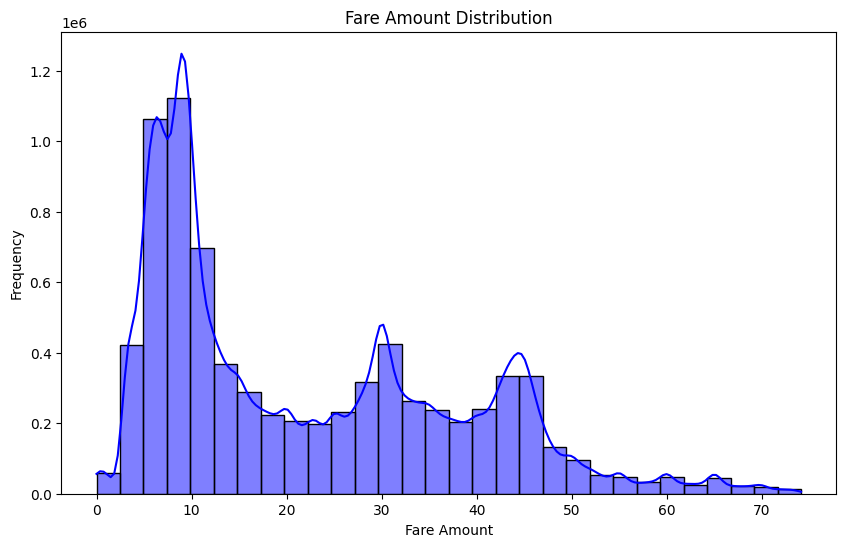

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True, color='blue')
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

1. Multimodal Distribution:
- The fare amount distribution is clearly multimodal, indicating the presence of multiple fare clusters.
- There are distinct peaks around fare amounts of approximately 10, 30, and 50, suggesting common fare ranges or pricing structures, possibly related to common trip lengths or fixed fare rates.

2. Skewness and Outliers:
- The distribution is right-skewed, with a long tail extending towards higher fare values.
- This indicates that while most trips are relatively inexpensive, there are some high fare amounts, possibly representing longer trips, premium services, or surge pricing periods.

3. High Frequency of Low Fare Values:
- The highest density of rides appears to be concentrated around 5 to 15, indicating a large number of short-distance or low-cost trips.

4. Secondary Peaks:
- Secondary peaks around 30 and 50 suggest common fare ranges, potentially associated with popular routes, airport rides, or specific service types.

5. Potential Data Anomalies:
- The sharp peaks in the distribution may also indicate the presence of predefined fare categories or price caps, suggesting that fare amounts are not uniformly distributed.

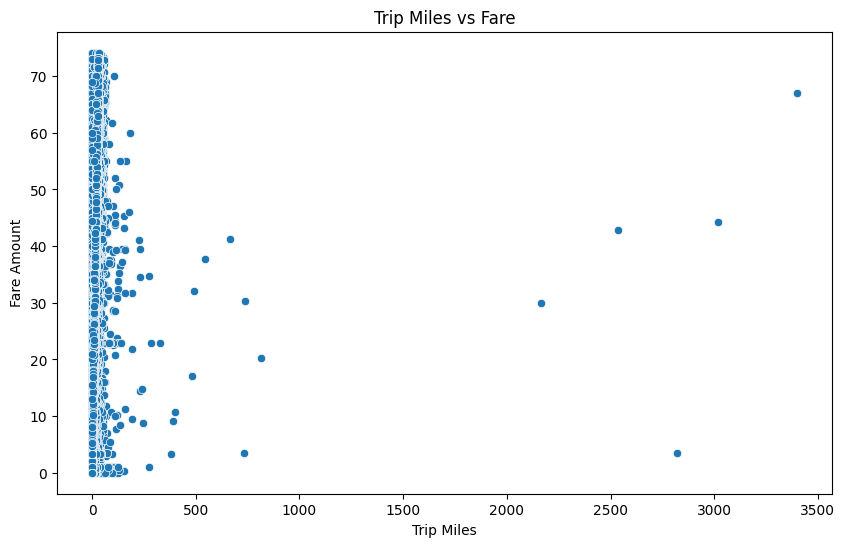

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Trip Miles', y='Fare', data=df)
plt.title('Trip Miles vs Fare')
plt.xlabel('Trip Miles')
plt.ylabel('Fare Amount')
plt.show()

- Clustered Data: Most rides are concentrated at very low trip miles (close to 0), indicating that most trips are very short.
- Outliers: There are several extreme outliers with trip miles exceeding 500 miles, which is highly unusual for typical ride-hailing trips. These may be data entry errors or very rare long-distance trips.
- No Clear Linear Relationship: There is no obvious linear trend between trip miles and fare, suggesting that other factors like time of day, traffic, or surcharges may be influencing fares.
- Potential Data Issues: Some points show very high mileage but relatively low fare, indicating possible data inaccuracies.

In [ ]:
# identifying outliers in Trip Miles
# calculating IQR for Trip Miles
Q1_miles = df['Trip Miles'].quantile(0.25)
Q3_miles = df['Trip Miles'].quantile(0.75)
IQR_miles = Q3_miles - Q1_miles

# defining outlier thresholds
lower_bound_miles = Q1_miles - 1.5 * IQR_miles
upper_bound_miles = Q3_miles + 1.5 * IQR_miles

print(f"Trip Miles - Lower Bound: {lower_bound_miles}, Upper Bound: {upper_bound_miles}")

# removing outliers in Trip Miles
df = df[(df['Trip Miles'] >= lower_bound_miles) & (df['Trip Miles'] <= upper_bound_miles)]

print(f"Data shape after removing Trip Miles outliers: {df.shape}")

Trip Miles - Lower Bound: -15.199999999999998, Upper Bound: 28.159999999999997
Data shape after removing Trip Miles outliers: (7751164, 18)


In [ ]:
# calculaing IQR for Fare
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# defining outlier thresholds
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

print(f"Fare - Lower Bound: {lower_bound_fare}, Upper Bound: {upper_bound_fare}")

# removing outliers in Fare
df = df[(df['Fare'] >= lower_bound_fare) & (df['Fare'] <= upper_bound_fare)]

print(f"Data shape after removing Fare outliers: {df.shape}")

Fare - Lower Bound: -29.494999999999997, Upper Bound: 71.82499999999999
Data shape after removing Fare outliers: (7746244, 18)


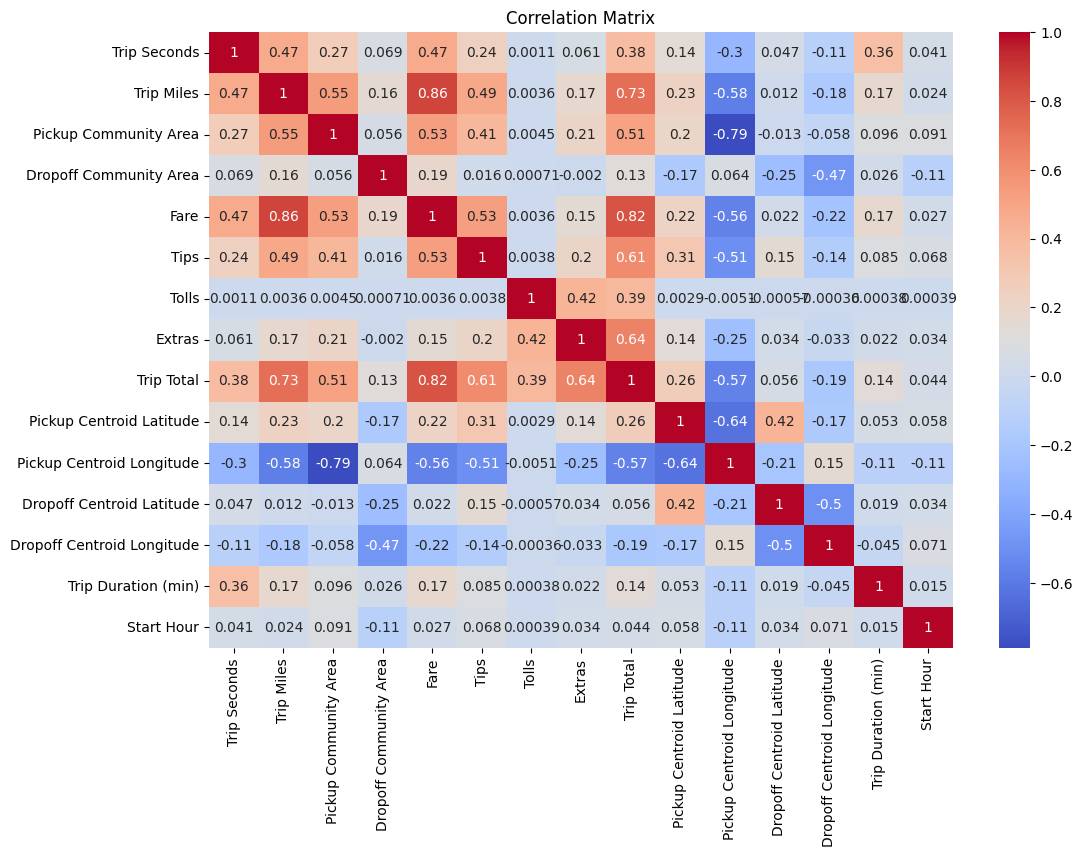

In [ ]:
# finding correlation between features
# selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# calculating correlation
correlation_matrix = numeric_df.corr()

# plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1. Strong Relationships:
- Trip Miles and Fare (0.86): Longer trips result in higher fares.
- Trip Total and Fare (0.82): Trip Total includes fare components, making it redundant.
2. Moderate Relationships:
- Tips and Fare (0.53): Higher fares generally include higher tips.
- Trip Seconds and Trip Miles (0.47): Longer trips typically have longer durations.
3. Negative Relationships:
- Pickup Centroid Longitude and Fare (-0.56): Certain pickup locations are associated with lower fares.

In [ ]:
# dropping Trip Total
df.drop('Trip Total', axis=1, inplace=True)

In [ ]:
df.shape

(7746244, 17)

In [ ]:
df.head()

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Trip Duration (min),Start Hour,Day of Week
0,4051.0,17.12,76.0,32.000000,45.50,10.00,0.0,4.0,Credit Card,Flash Cab,41.979071,-87.903040,41.884987,-87.620993,60.0,17,Friday
1,1749.0,12.70,6.0,26.293706,33.75,0.00,0.0,0.0,Cash,Flash Cab,41.944227,-87.655998,41.892138,-87.660800,30.0,14,Sunday
2,517.0,3.39,6.0,8.000000,10.91,2.78,0.0,1.0,Mobile,Taxicab Insurance Agency Llc,41.944227,-87.655998,41.899602,-87.633308,0.0,9,Friday
3,2050.0,15.06,76.0,26.293706,39.25,11.31,0.0,5.5,Credit Card,Globe Taxi,41.980264,-87.913625,41.892138,-87.660800,45.0,8,Monday
4,1004.0,1.18,32.0,32.000000,15.94,3.72,0.0,0.0,Mobile,5 Star Taxi,41.880994,-87.632746,41.880994,-87.632746,15.0,19,Thursday


In [ ]:
# identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# initializing label encoder
le = LabelEncoder()

# applying LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Fare', axis=1))
X = pd.DataFrame(scaled_features, columns=df.drop('Fare', axis=1).columns)
y = df['Fare']

In [ ]:
print(X.shape)
X.head()

(7746244, 16)


,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Tips,Tolls,Extras,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Trip Duration (min),Start Hour,Day of Week
0,1.796201,1.591927,1.552302,0.300770,1.750675,-0.005032,0.196300,-0.421873,-0.601537,1.214192,-1.798380,-0.128138,0.575819,0.539532,0.633047,-1.489603
1,0.326257,0.923355,-1.153143,0.011235,-0.699751,-0.005032,-0.200049,-0.937616,-0.601537,0.671045,0.397975,0.000419,-0.011871,0.125985,0.047917,-0.041899
2,-0.460437,-0.484882,-1.153143,-0.916981,-0.018532,-0.005032,-0.100962,0.609613,1.369052,0.671045,0.397975,0.134622,0.394006,-0.287562,-0.927299,-1.489603
3,0.518461,1.280330,1.552302,0.011235,2.071680,-0.005032,0.344930,-0.421873,-0.503007,1.232796,-1.892487,0.000419,-0.011871,0.332758,-1.122342,-1.007035
4,-0.149463,-0.819168,-0.148263,0.300770,0.211807,-0.005032,-0.200049,0.609613,-1.685361,-0.314607,0.604698,-0.199922,0.402296,-0.080789,1.023133,0.440670


In [ ]:
print(y.shape)
y.head()

(7746244,)


,Fare
0,45.50
1,33.75
2,10.91
3,39.25
4,15.94


In [ ]:
# X.to_csv('X_data.csv', index=False)
# y.to_csv('y_data.csv', index=False)

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/X_data.csv')
X.head()

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Tips,Tolls,Extras,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Trip Duration (min),Start Hour,Day of Week
0,1.796201,1.591927,1.552302,0.300770,1.750675,-0.005032,0.196300,-0.421873,-0.601537,1.214192,-1.798380,-0.128138,0.575819,0.539532,0.633047,-1.489603
1,0.326257,0.923355,-1.153143,0.011235,-0.699751,-0.005032,-0.200049,-0.937616,-0.601537,0.671045,0.397975,0.000419,-0.011871,0.125985,0.047917,-0.041899
2,-0.460437,-0.484882,-1.153143,-0.916981,-0.018532,-0.005032,-0.100962,0.609613,1.369052,0.671045,0.397975,0.134622,0.394006,-0.287562,-0.927299,-1.489603
3,0.518461,1.280330,1.552302,0.011235,2.071680,-0.005032,0.344930,-0.421873,-0.503007,1.232796,-1.892487,0.000419,-0.011871,0.332758,-1.122342,-1.007035
4,-0.149463,-0.819168,-0.148263,0.300770,0.211807,-0.005032,-0.200049,0.609613,-1.685361,-0.314607,0.604698,-0.199922,0.402296,-0.080789,1.023133,0.440670


In [ ]:
y= pd.read_csv('/content/drive/MyDrive/y_data.csv')
y.head()

,Fare
0,45.50
1,33.75
2,10.91
3,39.25
4,15.94


In [ ]:
# splitting data into training data 70% and test data 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5422370, 16), (2323874, 16), (5422370, 1), (2323874, 1))

In [ ]:
# model building - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# model evaluation - Linear Regression
print("Linear Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression Evaluation:
MAE: 4.115035139263837
RMSE: 7.502541949231772
R2 Score: 0.7754562602881416


In [ ]:
# model building - Hist Gradient Boosting
hgb_model = HistGradientBoostingRegressor(max_iter=100, random_state=111)
hgb_model.fit(X_train, y_train)
y_pred_hgb = hgb_model.predict(X_test)

In [ ]:
# model evaluation - Hist Gradient Boosting
print("Hist Gradient Boosting Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_hgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_hgb)))
print("R2 Score:", r2_score(y_test, y_pred_hgb))

Hist Gradient Boosting Evaluation:
MAE: 1.719520623553341
RMSE: 4.342560304076825
R2 Score: 0.9247726431659623


In [ ]:
# # model building - Random Forest
# # reducing the data size for quicker training
# X_train_sample = X_train.sample(frac=0.5, random_state=111)
# y_train_sample = y_train.loc[X_train_sample.index]

# # training the model on the reduced dataset
# rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=111)
# rf_model.fit(X_train_sample, y_train_sample)
# y_pred_rf = rf_model.predict(X_test)

In [ ]:
# # model evaluation - Random Forest
# print("Random Forest Evaluation:")
# print("MAE:", mean_absolute_error(y_test, y_pred_rf))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
# print("R2 Score:", r2_score(y_test, y_pred_rf))

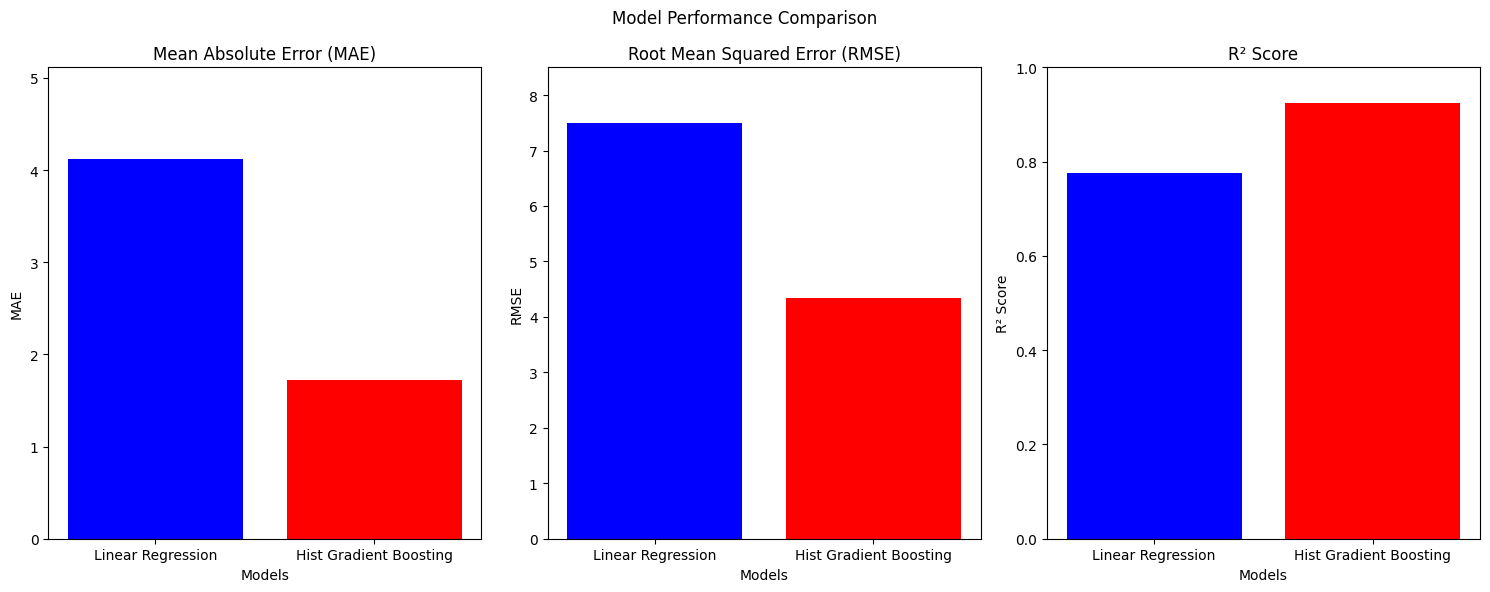

In [ ]:
models = ['Linear Regression', 'Hist Gradient Boosting']

# evaluation Metrics
mae_scores = [4.115, 1.72]
rmse_scores = [7.50, 4.34]
r2_scores = [0.775, 0.925]

# plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# MAE Comparison
ax[0].bar(models, mae_scores, color=['blue', 'red'])
ax[0].set_title('Mean Absolute Error (MAE)')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('MAE')
ax[0].set_ylim(0, max(mae_scores) + 1)

# RMSE Comparison
ax[1].bar(models, rmse_scores, color=['blue', 'red'])
ax[1].set_title('Root Mean Squared Error (RMSE)')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('RMSE')
ax[1].set_ylim(0, max(rmse_scores) + 1)

# R² Score Comparison
ax[2].bar(models, r2_scores, color=['blue', 'red'])
ax[2].set_title('R² Score')
ax[2].set_xlabel('Models')
ax[2].set_ylabel('R² Score')
ax[2].set_ylim(0, 1)

plt.suptitle('Model Performance Comparison')
plt.tight_layout()
plt.show()

1. Linear Regression:
- MAE: 4.12 – On average, the model's predictions are off by approximately $4.12, indicating significant prediction errors for some rides.
- RMSE: 7.50 – The relatively high RMSE indicates the presence of outliers or large prediction errors.
- R² Score: 0.775 – The model explains 77.5% of the variance in fare prices, indicating moderate predictive power.

2. Histogram Gradient Boosting (HGB):
- MAE: 1.72 – The average error is significantly lower than Linear Regression, suggesting better accuracy.
- RMSE: 4.34 – The lower RMSE indicates that the HGB model effectively reduces large prediction errors.
- R² Score: 0.925 – The model explains 92.5% of the variance, a substantial improvement over Linear Regression, indicating strong predictive capability.

### Key Takeaways:
Model Comparison:
- HGB significantly outperforms Linear Regression across all evaluation metrics, suggesting that the model effectively handles non-linear relationships in the dataset.
- The high R² score (0.925) for HGB indicates that the model is capturing most of the variance in fare prices, making it the preferred model for deployment.


In [ ]:
# saving the best model
best_model = hgb_model
model_file = 'fare_prediction_model.pkl'
with open(model_file, 'wb') as f:
    pickle.dump(best_model, f)

In [ ]:
# # Streamlit Deployment
# st.title('Dynamic Fare Prediction App')
# distance = st.number_input('Enter Trip Miles:', min_value=0.0, max_value=100.0, step=0.1)

# if st.button('Predict Fare'):
#     input_data = scaler.transform([[distance]])
#     with open(model_file, 'rb') as f:
#         model = pickle.load(f)
#     prediction = model.predict(input_data)
#     st.write(f'Predicted Fare: ${prediction[0]:.2f}')